In [11]:
import tensorflow as tf

import tensorflow_datasets as tfds
from random import randint

import matplotlib.pyplot as plt

# HW5

For this homework, we are going to use [CELEB-A dataset](https://www.tensorflow.org/datasets/catalog/celeb_a). CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter. CelebA has large diversities, large quantities, and rich annotations, including - 10,177 number of identities, - 202,599 number of face images, and - 5 landmark locations, 40 binary attributes annotations per image.

Follow the step-by-step instructions below to dowload data.

## Downloading the CELEB-A Dataset 

In this section, I will guide you to manually fetch and install the CELEB-A dataset so that TensorFlow Datasets (TFDS) can load it properly for this homework.


### Step 1: Create a Local Dataset Directory

Choose a directory on your machine to store TensorFlow datasets (replace with your preferred path). We will refer to this path as your `DATA_DIR`. For me the setup is like below, but you should change it for your setup accordingly. If the directory does not exist, create it.

In [28]:
# WRITE THE LOCATION OF THE DATA DIRECTORY
DATA_DIR = "/home/kaygun/local/data/tensorflow_datasets/"

### Step 2: Manually Download the Dataset

TensorFlow cannot automatically fetch CELEB-A due to Google Drive download restrictions. Follow these steps:

1. Open the official download link in a browser:

   [https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM/view](https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM/view)

   Click the **"Download anyway"** button (you may need to wait or confirm warnings about large files).

2. This will download a file named: `img_align_celeba.zip`

3. After download completes, **create a subdirectory** called `downloads/manual` and **move the file into the manual data directory**. In my case this is "/home/kaygun/local/data/tensorflow_datasets/dowloads/manual/".

### Step 3: Prepare the Dataset with TensorFlow Datasets

Once the file is in place, use the following Python code to prepare the dataset:

In [7]:
# Initialize and prepare the dataset builder
builder = tfds.builder('celeb_a', data_dir=DATA_DIR)

builder.download_and_prepare(download_config=tfds.download.DownloadConfig(
    manual_dir=f"{DATA_DIR}/downloads/manual",
    download_mode=tfds.download.GenerateMode.REUSE_CACHE_IF_EXISTS
))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/162770 [00:00<?, ? examples/s]

Shuffling /home/kaygun/local/data/tensorflow_datasets/celeb_a/2.1.0.incomplete12QLDD/celeb_a-train.tfrecord*..…

Generating validation examples...:   0%|          | 0/19867 [00:00<?, ? examples/s]

Shuffling /home/kaygun/local/data/tensorflow_datasets/celeb_a/2.1.0.incomplete12QLDD/celeb_a-validation.tfreco…

Generating test examples...:   0%|          | 0/19962 [00:00<?, ? examples/s]

Shuffling /home/kaygun/local/data/tensorflow_datasets/celeb_a/2.1.0.incomplete12QLDD/celeb_a-test.tfrecord*...…

Dataset celeb_a downloaded and prepared to /home/kaygun/local/data/tensorflow_datasets/celeb_a/2.1.0. Subsequent calls will reuse this data.


After this step, the dataset will be extracted, validated, and cached in a format that can be loaded.

### Notes

- The CELEB-A dataset is ~1.3 GB. Make sure you have enough disk space.
- Do **not unzip** the archive. TFDS expects the raw `.zip` file.
- The dataset will only need to be downloaded once; subsequent runs will use the cached version.

## Ingesting the Dataset into Our Environment

Now, let us load up the data:


In [8]:
train_ds, val_ds, test_ds = tfds.load(
    'celeb_a',
    split=['train', 'validation', 'test'],
    data_dir=DATA_DIR,
    as_supervised=False
)

2025-05-01 14:09:55.675616: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


I'll take 10 random examples from the training set.

In [ ]:
N = 10
examples = list(train_ds.take(N))

Now, let us display a random image together with the metadata attached (here called 'attributes') to the picture:

{'5_o_Clock_Shadow': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Arched_Eyebrows': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Attractive': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Bags_Under_Eyes': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Bald': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Bangs': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Big_Lips': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Big_Nose': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Black_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
 'Blond_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Blurry': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Brown_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Bushy_Eyebrows': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
 'Chubby': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Double_Chin': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Eyeglasses': <tf.Tensor: shape=(), dtype=bool, numpy=Fals

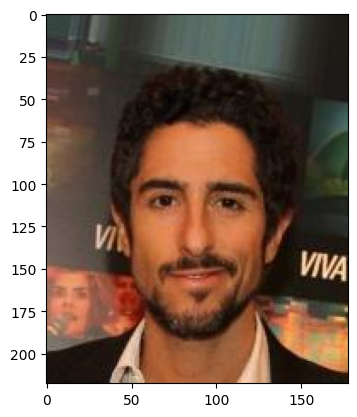

In [27]:
example = examples[randint(0,N)]
plt.imshow(example['image'])
example['attributes']

Here is another example with its attributes:

{'5_o_Clock_Shadow': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Arched_Eyebrows': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
 'Attractive': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
 'Bags_Under_Eyes': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Bald': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Bangs': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Big_Lips': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Big_Nose': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Black_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Blond_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
 'Blurry': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Brown_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Bushy_Eyebrows': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Chubby': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Double_Chin': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Eyeglasses': <tf.Tensor: shape=(), dtype=bool, numpy=False

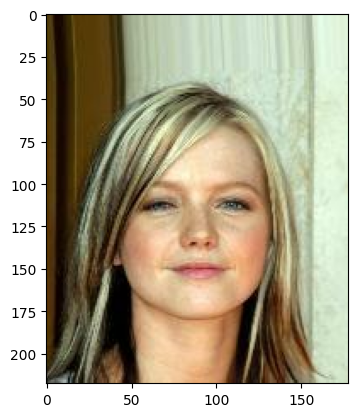

In [25]:
example = examples[randint(0,N)]
plt.imshow(example['image'])
example['attributes']

# Questions

In the questions below, you will construct and evaluate several classification models based on the CELEB-A dataset. Your goal is not only to develop accurate classifiers, but also to critically assess and compare the models through rigorous validation and analysis.

As before follow the rules stated below:

- Do not split your answers into separate files. All answers must be in a single jupyter notebook.
- Follow the step-by-step instructions provided at the beginning of this document to download and prepare the CELEB-A dataset using `tensorflow_datasets`. 
- Refrain from using code comments to explain what has been done. Document your steps by writing appropriate markdown cells in your notebook.
- Avoid duplicating code by copying and pasting it from one cell to another. If copying and pasting is necessary, develop a suitable function for the task at hand and call that function.
- When providing parameters to a function, never use global variables. Instead, always pass parameters explicitly and always make use of local variables.
- Document your use of LLM models (ChatGPT, Claude, Code Pilot etc). You may
   + provide working links to your logs
   + take screenshots of your steps and include them with this notebook, or
   + give me a full log (both questions and answers) in a markdown file named HW5-LLM-LOG.md.

Failure to adhere to these guidelines will result in a 15-point deduction for each infraction.


## Q1 — Linear Models for Gender Classification

1. Train a **Support Vector Machine (SVM)** and a **Logistic Regression** model to classify the **gender** of the person in the image.
2. Evaluate both models using a rigorous **cross-validation scheme** and present a comprehensive **error analysis**.
3. **Select and justify** the model you believe is better suited to the task, both in terms of accuracy, precision, recall, and computational considerations.


## Q2 — Ensemble Models for Glasses Detection

1. Train a **Random Forest** classifier and a **Boosting-based** classifier (e.g., AdaBoost, Gradient Boosting, XGBoost, or LightGBM — restricted to those covered in lectures) to predict whether the person in the image is **wearing glasses**.
2. Evaluate both models using a rigorous **cross-validation scheme** and present a comprehensive **error analysis**.
3. **Select and justify** the model you believe is better suited to the task, both in terms of accuracy, precision, recall, and computational considerations.


## Q3 — Neural Network Models for Smile Detection

1. Design and train **two distinct neural network architectures** for the task of predicting whether the person is **smiling**. Second model must have more hidden layer than the first one. You should explore different design choices, such as:
   - Convolutional and pooling layers
   - Activation functions (e.g., ReLU, tanh)
   - Use or omission of dropout, batch normalization, or skip connections
   - Loss functions (binary accuracy, binary cross-entropy etc.)
   - Choice of optimizers (ADAM, SGD etc.)
   - Learning rates.
2. Evaluate both models using a rigorous **cross-validation scheme** and present a comprehensive **error analysis**.
3. **Select and justify** the model you believe is better suited to the task, both in terms of accuracy, precision, recall, and computational considerations.


## Q4 — Reflective Report

Write a structured qualitative report reflecting on your process, design decisions, and implementation.

Address the following questions in your narrative:

- What were the main challenges you encountered, and how did you overcome them?
- Which part of the process (e.g., data handling, model implementation, debugging) consumed the most time and effort?
- Which class of models — linear (SVM vs logistic regression), ensemble (random forests vs boosting), or neural networks — did you find most **intuitive to implement**, most **computationally efficient**, and most **effective** in terms of performance?
- In designing the neural network models, I expect you to do a lot of experimentation. I don't expect you to document the whole list of different choices you made. A section of your report must include a detailed analysis of your experiments with the neural network models.
   + Which neural network framework did you choose, and why?
   + How did increasing the number of layers affect the results?
   + How did you make your choices of layers, activation functions, number of neurons, loss functions, optimizers, learning rates? 
